<ins><b>Neural Network & Deep Learning : Experiment No. 1</b></ins>


<ins><b>Lab - 1 :</b></ins> Implementation of Perceptron from scratch

# Key components of the Lab Experiment

1. Reading the dataset
2. Exploratory Data Analsis
3. Pre-processing
4. Test-Train Split
5. Implementation of the Perceptron
6. Tuning the number of epochs
7. Final Model
8. References

# Importing the required modules

In [31]:
# Modules used for data handling and linear algebra operations.
import pandas as pd
import numpy as np

# Modules used for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

# Modules used for encoding the categorical variables.
from sklearn.preprocessing import OneHotEncoder

# Reading the dataset

In [32]:
df = pd.read_csv("cirrhosis.csv",header=None)

In [33]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
1,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261,2.6,156,1718,137.95,172,190,12.2,4
2,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3
3,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176,3.48,210,516,96.1,55,151,12,4
4,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4


In [34]:
df.columns = df.iloc[0]
df = df[1:]
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
1,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261,2.6,156,1718,137.95,172,190,12.2,4
2,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3
3,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176,3.48,210,516,96.1,55,151,12,4
4,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4
5,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279,3.53,143,671,113.15,72,136,10.9,3


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 1 to 418
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             418 non-null    object
 1   N_Days         418 non-null    object
 2   Status         418 non-null    object
 3   Drug           312 non-null    object
 4   Age            418 non-null    object
 5   Sex            418 non-null    object
 6   Ascites        312 non-null    object
 7   Hepatomegaly   312 non-null    object
 8   Spiders        312 non-null    object
 9   Edema          418 non-null    object
 10  Bilirubin      418 non-null    object
 11  Cholesterol    284 non-null    object
 12  Albumin        418 non-null    object
 13  Copper         310 non-null    object
 14  Alk_Phos       312 non-null    object
 15  SGOT           312 non-null    object
 16  Tryglicerides  282 non-null    object
 17  Platelets      407 non-null    object
 18  Prothrombin    416 non-null   

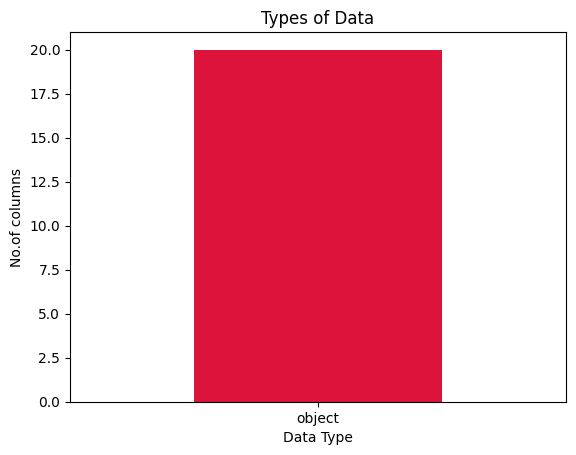

In [36]:
df.dtypes.value_counts().plot(kind="bar",
                              title="Types of Data",
                              xlabel="Data Type",
                              ylabel="No.of columns",
                              rot=0,
                              color=["crimson","orange"])
plt.show()

The dataset has mainly categorical variables and few numericals variables.

# Exploratory Data Analysis

In Exploratory Data Analysis the following parts are included:
1. Seggragation of columns (into categorical and numerical)
2. Analysis of Missing Values
3. Target Variable Class Distribution

## Seggregating columns

The columns with data type as Object are considered as categorical while others are considered as numerical.

In [37]:
cat_cols = []
num_cols = []

for i in df.columns:
    if df[i].dtype == "O":
        cat_cols.append(i)
    else:
        num_cols.append(i)

## Missing Values Analysis

Since, the UCI data repository mentions missing values as "?" instead of null values the analysis has to be carried out accordingly.

In [38]:
null_freq = []
for i in df.columns:
    f = dict(df[i].value_counts())
    if "?" in f.keys():
        null_freq.append(f["?"]*100/len(df))
    else:
        null_freq.append(0)

In [39]:
null_freq

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## Target Variable Analysis

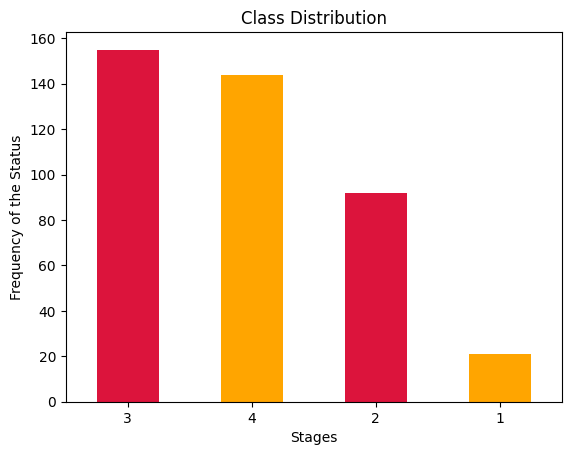

In [40]:
df['Stage'].value_counts().plot(kind="bar",
                           title="Class Distribution",
                           xlabel="Stages",
                           ylabel="Frequency of the Status",
                           color=["crimson","orange"],
                           rot=0)
plt.show()

# Pre-processing

## Handling Missing Values

In [41]:
df = df.replace({"?":None})

In [42]:
df = df.dropna()

## Encoding the columns

In [43]:
encoder = OneHotEncoder(sparse=False)
for i in cat_cols:
    df[i] = encoder.fit_transform(df[i].values.reshape(-1,1))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site

In [44]:
df = df.reset_index()

# Test Train Split

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,
    df['Stage'],
    test_size = 0.10,
    train_size=0.90,
    random_state = 0
)
X_train.pop('Stage')
X_test.pop('Stage')

184    0.0
15     0.0
55     1.0
74     0.0
188    0.0
209    0.0
92     0.0
223    0.0
125    0.0
190    0.0
116    0.0
218    0.0
244    0.0
101    0.0
189    0.0
22     0.0
59     0.0
156    0.0
270    0.0
8      0.0
63     0.0
152    0.0
194    0.0
200    0.0
12     0.0
173    0.0
89     1.0
122    0.0
Name: Stage, dtype: float64

In [46]:
X_train

,index,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
7,9,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
215,249,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
220,254,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
108,122,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
81,92,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,287,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
192,225,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
117,135,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
47,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Perceptron

In [47]:
class Perceptron:

    # Initialising the required parameters for the perceptron.
    def __init__(self, X, y, learning_rate, epochs : int):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.epochs = epochs

    # Activation function.
    def __activation_function(self,x):
        return 1.0 if (x > 0) else 0.0

    # The model training or fitting by updating weights.
    def fit(self):
        n_rows,n_cols = self.X.shape
        self.weights = np.zeros((n_cols + 1, 1))
        for epoch in range(self.epochs):
            for index, features in enumerate(self.X.values):
                feature_transposed = np.insert(features, 0, 1).reshape(-1,1)
                predicted_target = self.__activation_function(np.dot(feature_transposed.T, self.weights))
                flag = np.squeeze(predicted_target) - self.y[index]
                if flag != 0:
                    self.weights += self.learning_rate*((self.y[index] - predicted_target)*feature_transposed)

    # Predicting on a single instance.
    def predict(self, X_test):
        return self.__activation_function(np.dot(p.weights.reshape(1,-1)[0],X_test))

    # Predicting on a larger number of instances and returning accuracy.
    def test(self, test_data, y):
        x = []
        for i in range(len(test_data.values)):
            X_test = np.array(test_data.iloc[i])
            x.append(p.predict(np.insert(X_test,0,1)) == p.y[i])
        return sum(x)*100/len(test_data)

# Initialising the Perceptron Parameters

In [48]:
y = np.array(pd.DataFrame(y_train).reset_index().drop(["index"],axis=1))
X = pd.DataFrame(X_train).reset_index().drop(["index"],axis=1)
p = Perceptron(X, y, 0.5, 50)

# Fitting the model

In [49]:
p.fit()

# Test Accuracy

In [50]:
p.test(pd.DataFrame(X_test).reset_index().drop(["index"],axis=1),
     np.array(pd.DataFrame(y_test).reset_index().drop(["index"],axis=1)))

array([96.42857143])

# Train Accuracy

In [51]:
p.test(X,y)

array([95.96774194])

# Tuning the number of epochs

In [52]:
train_acc = []
test_acc = []
epochs = []

for i in range(20,200,20):
    y = np.array(pd.DataFrame(y_train).reset_index().drop(["index"],axis=1))
    X = pd.DataFrame(X_train).reset_index().drop(["index"],axis=1)
    p = Perceptron(X, y, 0.5, i)
    p.fit()
    train_acc.append(p.test(X,y))
    test_acc.append(p.test(pd.DataFrame(X_test).reset_index().drop(["index"],axis=1),
     np.array(pd.DataFrame(y_test).reset_index().drop(["index"],axis=1))))
    epochs.append(i)

# Train-Test Accuracies across different epochs

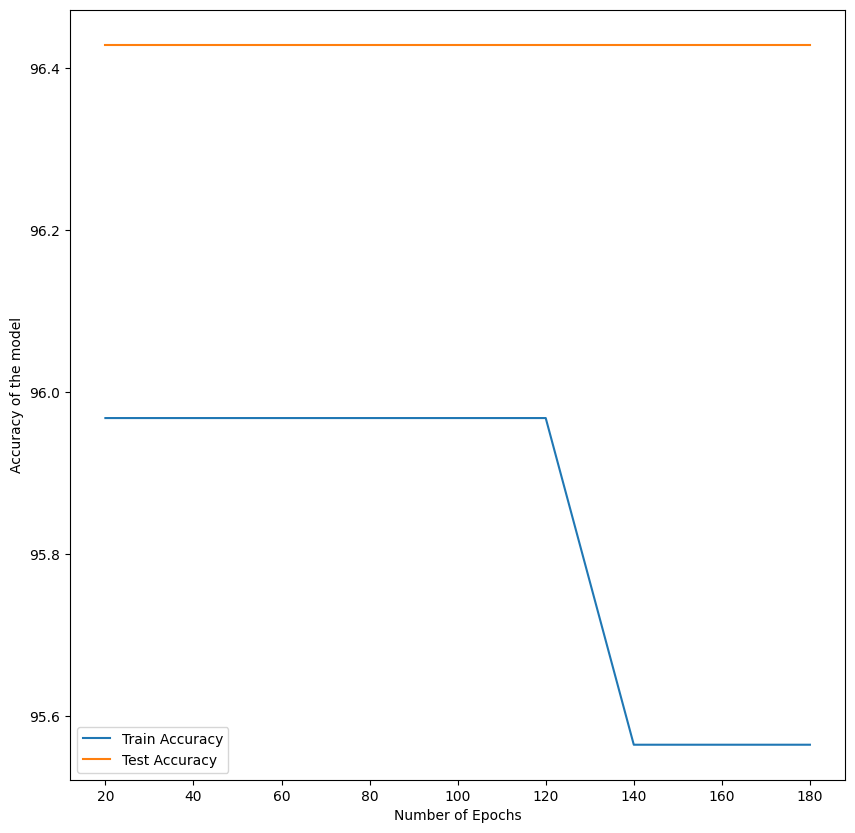

In [53]:
plt.figure(figsize=(10,10))
plt.plot(epochs,train_acc)
plt.plot(epochs,test_acc)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy of the model")
plt.legend(['Train Accuracy',"Test Accuracy"])
plt.show()

# Final Model

In [54]:
tuning = pd.DataFrame({"epochs":np.array(epochs).squeeze(),"train accuracy":np.array(train_acc).squeeze(), "test accuracy":np.array(test_acc).squeeze()})

In [55]:
def diff(row):
    return row[1] - row[2]

In [56]:
tuning["Difference"] = tuning.apply(diff,axis=1)

/var/folders/fp/tqnwc7rd219_w0rxtd8b8pz00000gn/T/ipykernel_85335/844949158.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return row[1] - row[2]


In [57]:
tuning.sort_values(by="Difference")

,epochs,train accuracy,test accuracy,Difference
6,140,95.564516,96.428571,-0.864055
7,160,95.564516,96.428571,-0.864055
8,180,95.564516,96.428571,-0.864055
0,20,95.967742,96.428571,-0.460829
1,40,95.967742,96.428571,-0.460829
2,60,95.967742,96.428571,-0.460829
3,80,95.967742,96.428571,-0.460829
4,100,95.967742,96.428571,-0.460829
5,120,95.967742,96.428571,-0.460829
